In [1]:
import os
import requests
import zipfile

import pandas as pd
from datetime import datetime, timedelta
from loguru import logger

from stock_prediction import datasets


In [2]:
inpc = datasets.get_inpc()
ipca = datasets.get_ipca()
ipp = datasets.get_ipp()
cost_m2 = datasets.get_m2_cost()

/opt/conda/lib/python3.11/site-packages/stock_prediction/datasets/_tools.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[value_column] = data[value_column].apply(lambda x: _to_number(x))
/opt/conda/lib/python3.11/site-packages/stock_prediction/datasets/_tools.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[value_column] = data[value_column].apply(lambda x: _to_number(x))


In [5]:

cost_m2.mean()

variable
date                              2005-01-14 03:11:09.026548736
cost_m2                                             1155.794627
cost_m2_current_year_variation                         3.721119
cost_m2_index                                          5.785032
cost_m2_labor                                        519.458433
cost_m2_labor_index                                    8.198166
cost_m2_last_year_variation                            6.841418
cost_m2_material                                     636.336194
cost_m2_material_index                                 4.820193
cost_m2_month_variation                                0.536343
dtype: object

In [62]:
ipp.mean()

date                                                          2016-11-14 05:46:59.277108480
ipp_current_year_chemicals                                                         0.056854
ipp_current_year_clothes                                                           0.043424
ipp_current_year_drink                                                              0.02081
ipp_current_year_eletrical_machine_apparatus_and_materials                         0.043878
                                                                          ...              
ipp_n_indice_smoking                                                               0.836906
ipp_n_indice_textile                                                               0.985057
ipp_n_indice_transformation                                                        0.987778
ipp_n_indice_transportation_equipment_except_vehicles                              0.906284
ipp_n_indice_wood                                                               

In [18]:
import sidrapy



data_raw = sidrapy.get_table(
    table_code="1846",
    territorial_level="1",
    ibge_territorial_code="all",
    period="all",
    classifications={11255: "all"},
)

In [19]:
data_raw

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Trimestre (Código),Trimestre,Setores e subsetores (Código),Setores e subsetores,Variável (Código),Variável
1,1,Brasil,1550,Milhões de Reais,10054,1,Brasil,199601,1º trimestre 1996,90687,Agropecuária - total,585,Valores a preços correntes
2,1,Brasil,1550,Milhões de Reais,41474,1,Brasil,199601,1º trimestre 1996,90691,Indústria - total,585,Valores a preços correntes
3,1,Brasil,1550,Milhões de Reais,1763,1,Brasil,199601,1º trimestre 1996,90692,Indústrias extrativas,585,Valores a preços correntes
4,1,Brasil,1550,Milhões de Reais,23306,1,Brasil,199601,1º trimestre 1996,90693,Indústrias de transformação,585,Valores a preços correntes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2526,1,Brasil,1550,Milhões de Reais,472156,1,Brasil,202302,2º trimestre 2023,93405,Despesa de consumo da administração pública,585,Valores a preços correntes
2527,1,Brasil,1550,Milhões de Reais,457041,1,Brasil,202302,2º trimestre 2023,93406,Formação bruta de capital fixo,585,Valores a preços correntes
2528,1,Brasil,1550,Milhões de Reais,-18413,1,Brasil,202302,2º trimestre 2023,102880,Variação de estoque,585,Valores a preços correntes
2529,1,Brasil,1550,Milhões de Reais,509203,1,Brasil,202302,2º trimestre 2023,93407,Exportação de bens e serviços,585,Valores a preços correntes


In [43]:
from stock_prediction.datasets._tools import _to_number

def format_sidra_result(data_raw,  columns_mapping = None, values_mapping = None, pivot_columns = None, freq = "monthly"):

    periods = {
        "monthly": "month_code",
        "daily": "day_code",
        "quarter": "quarter_code",
        "yearly": "year_code",
    }

    value_column = "Valor"
    period_column = periods[freq]
    
    data = data_raw.iloc[1:]
    data.columns = data_raw.iloc[0]

    data[value_column] = data[value_column].apply(lambda x: _to_number(x))

    if columns_mapping:
        data = data[columns_mapping.keys()]
        data.columns = columns_mapping.values()

        if value_column in columns_mapping:
            value_column = columns_mapping[value_column]

        if period_column in columns_mapping:
            period_column = columns_mapping[period_column]
            

    if values_mapping:
        for col in values_mapping:
            data[col] = data[col].replace(values_mapping[col])

    if pivot_columns:
        data = data.pivot_table(
            values=value_column, index=period_column, columns=pivot_columns
        )
    
    return data

PIB_COLUMNS_MAPPING = {
    "Variável": "variable",
    "Trimestre (Código)": "quarter_code",
    "Valor": "value",
    "Setores e subsetores": "sector",
}

PIB_VALUES_MAPPING = {
    "variable": {
        "Valores a preços correntes": "pib",
    }
}

df = format_sidra_result(
    data_raw,
    columns_mapping=PIB_COLUMNS_MAPPING,
    values_mapping=PIB_VALUES_MAPPING,
    pivot_columns=["variable", "sector"],
    freq="quarter",
)

df

/tmp/ipykernel_103/602854240.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[value_column] = data[value_column].apply(lambda x: _to_number(x))


variable                                                              pib  \
sector       Administração, saúde e educação públicas e seguridade social   
quarter_code                                                                
199601                                                  27088.0             
199602                                                  28775.0             
199603                                                  28600.0             
199604                                                  36221.0             
199701                                                  29408.0             
...                                                         ...             
202202                                                 319504.0             
202203                                                 322156.0             
202204                                                 386042.0             
202301                                                 314688.0             
202302                                                 342682.0             

variable                           \
sector       Agropecuária - total   
quarter_code                        
199601                    10054.0   
199602                    10703.0   
199603                    11096.0   
199604                     8906.0   
199701                    12338.0   
...                           ...   
202202                   194820.0   
202203                   161537.0   
202204                   116479.0   
202301                   259728.0   
202302                   213968.0   

variable                                                                 \
sector       Atividades financeiras, de seguros e serviços relacionados   
quarter_code                                                              
199601                                                  16074.0           
199602                                                  15277.0           
199603                                                  19180.0           
199604                                                  18764.0           
199701                                                  16766.0           
...                                                         ...           
202202                                                 164408.0           
202203                                                 151510.0           
202204                                                 171860.0           
202301                                                 165017.0           
202302                                                 184895.0           

variable                                                   \
sector       Atividades imobiliárias  Comércio Construção   
quarter_code                                                
199601                       21647.0   12755.0    11972.0   
199602                       23734.0   14359.0    13587.0   
199603                       25828.0   15788.0    14767.0   
199604                       27031.0   16918.0    15104.0   
199701                       27561.0   14821.0    14443.0   
...                              ...       ...        ...   
202202                      187832.0  301545.0    65209.0   
202203                      197073.0  326508.0    71090.0   
202204                      203855.0  313187.0    73422.0   
202301                      202577.0  297419.0    70479.0   
202302                      207931.0  302948.0    75639.0   

variable                                                  \
sector       Despesa de consumo da administração pública   
quarter_code                                               
199601                                           35666.0   
199602                                           39023.0   
199603                                           41810.0   
199604                                           52324.0   
199701                                           42139.0   
...             

In [52]:
!pip install unidecode


In [53]:
from unidecode import unidecode

def normalize_column_name(texto):
    # Remover acentos, caracteres especiais e espaços, e converter para minúsculas
    texto = unidecode(texto.lower())
    texto = texto.replace(' ', '_')
    texto = ''.join(c if c.isalnum() or c == '_' else '' for c in texto)
    return texto
    
transformar_texto('Administração, saúde e educaçao públicas e seguridade social')

'administracao_saude_e_educacao_publicas_e_seguridade_social'

In [ ]:
'Administração, saúde e educaçao públicas e seguridade social' 'administracao_saude_e_educacao_publicas_e_seguridade_social'

In [48]:
df.columns[0][1]

'Administração, saúde e educação públicas e seguridade social'

In [17]:
data_raw['D4N'].unique()

array(['Variável', 'Valores a preços correntes'], dtype=object)

In [14]:
df = format_sidra_result(
    data_raw,
    columns_mapping=IPP_COLUMNS_MAPPING,
    values_mapping=IPP_VALUES_MAPPING,
    pivot_columns=["variable", "industry_sector"],
)
df.columns = [str(_[0]) + "_" + str(_[1]) for i, _ in enumerate(df.columns)]

array(['Valor', '..'], dtype=object)

In [4]:
import sidrapy
from stock_prediction.datasets._tools import format_sidra_result, set_date_from_monthcode

data_raw = sidrapy.get_table(
    table_code="2296",
    territorial_level="1",
    ibge_territorial_code="all",
    period="all",
)

In [51]:
M2_COST_COLUMNS_MAPPING = {
    "Variável": "variable",
    "Mês (Código)": "month_code",
    "Valor": "value",
}

M2_COST_VALUES_MAPPING = {
    "variable": {
        "Custo médio m² - moeda corrente": "cost_m2",
        "Custo médio m² - número-índice": "cost_m2_index",
        "Custo médio m² - componente material - moeda corrente": "cost_m2_material",
        "Custo médio m² - componente mão-de-obra - moeda corrente": "cost_m2_labor",
        "Custo médio m² - componente material - número-índice": "cost_m2_material_index",
        "Custo médio m² - componente mão-de-obra - número-índice": "cost_m2_labor_index",
        "Custo médio m² - variação percentual no mês": "cost_m2_month_variation",
        "Custo médio m² - variação percentual no ano": "cost_m2_current_year_variation",
        "Custo médio m² - variação percentual em doze meses": "cost_m2_last_year_variation",
    }
}

data = format_sidra_result(data_raw, columns_mapping = M2_COST_COLUMNS_MAPPING, values_mapping = M2_COST_VALUES_MAPPING, pivot_columns=["variable"])

index_columns = [x for x in data.columns if "index" in x]

data[index_columns] = data[index_columns] / 100

data = set_date_from_monthcode(data)
1846
for col in index_columns:
    data[col] = np.where(data["date"] < datetime(2012, 9, 1), np.nan, data[col])

data

/opt/conda/lib/python3.11/site-packages/stock_prediction/datasets/_tools.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[value_column] = data[value_column].apply(lambda x: _to_number(x))


variable,date,cost_m2,cost_m2_current_year_variation,cost_m2_index,cost_m2_labor,cost_m2_labor_index,cost_m2_last_year_variation,cost_m2_material,cost_m2_material_index,cost_m2_month_variation
0,1986-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1986-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1986-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1986-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1986-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
447,2023-06-30,1706.50,1.62,8.5422,704.87,11.1229,4.82,1001.63,7.5873,0.39
448,2023-07-31,1710.37,1.85,8.5619,708.59,11.1819,3.52,1001.78,7.5880,0.23
449,2023-08-31,1713.52,2.04,8.5773,713.10,11.2534,3.11,1000.42,7.5774,0.18
450,2023-09-30,1713.87,2.06,8.5790,715.70,11.2939,2.68,998.17,7.5607,0.02


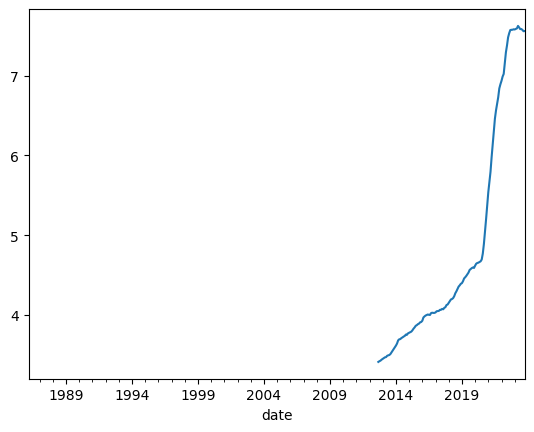

In [50]:
from datetime import datetime
import numpy as np


import matplotlib.pyplot as plt
data.set_index("date")["cost_m2_material_index"].plot()

# plt.ylim([0,200])

plt.show()

In [27]:
data

variable,date,cost_m2,cost_m2_current_year_variation,cost_m2_index,cost_m2_labor,cost_m2_labor_index,cost_m2_last_year_variation,cost_m2_material,cost_m2_material_index,cost_m2_month_variation
0,1986-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1986-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1986-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1986-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1986-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
447,2023-06-30,1706.50,1.62,8.5422,704.87,11.1229,4.82,1001.63,7.5873,0.39
448,2023-07-31,1710.37,1.85,8.5619,708.59,11.1819,3.52,1001.78,7.5880,0.23
449,2023-08-31,1713.52,2.04,8.5773,713.10,11.2534,3.11,1000.42,7.5774,0.18
450,2023-09-30,1713.87,2.06,8.5790,715.70,11.2939,2.68,998.17,7.5607,0.02


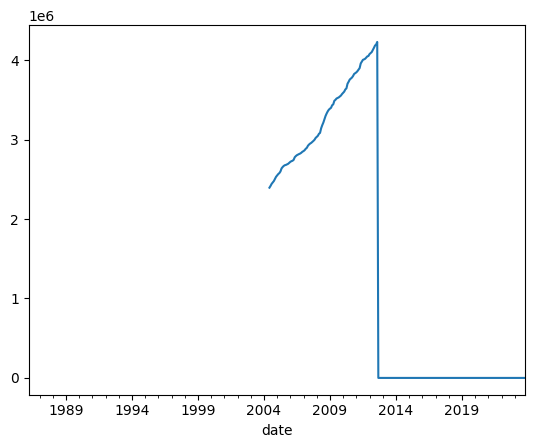

In [42]:
from stock_prediction.datasets._ipp import _to_number

def format_sidra_result(data_raw,  columns_mapping = None, values_mapping = None, pivot_columns = None):

    value_column = "Valor"
    monthcode_column = "month_code"
    
    data = data_raw.iloc[1:]
    data.columns = data_raw.iloc[0]

    data[value_column] = data[value_column].apply(lambda x: _to_number(x))

    if columns_mapping:
        data = data[columns_mapping.keys()]
        data.columns = columns_mapping.values()

        if value_column in columns_mapping:
            value_column = columns_mapping[value_column]

        if monthcode_column in columns_mapping:
            monthcode_column = columns_mapping[monthcode_column]
            

    if values_mapping:
        for col in values_mapping:
            data[col] = data[col].replace(values_mapping[col])

    if pivot_columns:
        data = data.pivot_table(
            values=value_column, index=monthcode_column, columns=pivot_columns
        )
    
    return data

    

In [43]:
data_raw

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Mês (Código),Mês,Variável (Código),Variável
1,1,Brasil,,,...,1,Brasil,198603,março 1986,48,Custo médio m² - moeda corrente
2,1,Brasil,,,...,1,Brasil,198603,março 1986,2119,Custo médio m² - componente material - moeda c...
3,1,Brasil,,,...,1,Brasil,198603,março 1986,2120,Custo médio m² - componente mão-de-obra - moed...
4,1,Brasil,30,Número-índice,0.33,1,Brasil,198603,março 1986,49,Custo médio m² - número-índice
...,...,...,...,...,...,...,...,...,...,...,...
4064,1,Brasil,30,Número-índice,756.22,1,Brasil,202310,outubro 2023,1193,Custo médio m² - componente material - número-...
4065,1,Brasil,30,Número-índice,1132.90,1,Brasil,202310,outubro 2023,1232,Custo médio m² - componente mão-de-obra - núme...
4066,1,Brasil,2,%,0.14,1,Brasil,202310,outubro 2023,1196,Custo médio m² - variação percentual no mês
4067,1,Brasil,2,%,2.20,1,Brasil,202310,outubro 2023,1197,Custo médio m² - variação percentual no ano


In [51]:
columns_mapping = {
    "Variável": "variable",
    "Mês (Código)": "month_code",
    "Valor": "value",
}

values_mapping = {
    "variable": {
        "Custo médio m² - moeda corrente": "cost_m2",
        "Custo médio m² - número-índice": "cost_m2_index",
        "Custo médio m² - componente material - moeda corrente": "cost_m2_material",
        "Custo médio m² - componente mão-de-obra - moeda corrente": "cost_m2_labor",
        "Custo médio m² - componente material - número-índice": "cost_m2_material_index",
        "Custo médio m² - componente mão-de-obra - número-índice": "cost_m2_labor_index",
        "Custo médio m² - variação percentual no mês": "cost_m2_month_variation",
        "Custo médio m² - variação percentual no ano": "cost_m2_current_year_variation",
        "Custo médio m² - variação percentual em doze meses": "cost_m2_last_year_variation",
    }
}

data = format_sidra_result(data_raw, columns_mapping = columns_mapping, values_mapping = values_mapping, pivot_columns=["variable"])

index_columns = [x for x in data.columns if "index" in x]

# data[index_columns] = data[index_columns] / 100

data

/tmp/ipykernel_105/3701872916.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[value_column] = data[value_column].apply(lambda x: _to_number(x))


variable,cost_m2,cost_m2_current_year_variation,cost_m2_index,cost_m2_labor,cost_m2_labor_index,cost_m2_last_year_variation,cost_m2_material,cost_m2_material_index,cost_m2_month_variation
month_code,,,,,,,,,
198603,NaN,NaN,0.33,NaN,NaN,NaN,NaN,NaN,NaN
198604,NaN,NaN,0.33,NaN,NaN,NaN,NaN,NaN,NaN
198605,NaN,NaN,0.34,NaN,NaN,NaN,NaN,NaN,NaN
198606,NaN,NaN,0.34,NaN,NaN,NaN,NaN,NaN,NaN
198607,NaN,NaN,0.35,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
202306,1706.50,1.62,854.22,704.87,1112.29,4.82,1001.63,758.73,0.39
202307,1710.37,1.85,856.19,708.59,1118.19,3.52,1001.78,758.80,0.23
202308,1713.52,2.04,857.73,713.10,1125.34,3.11,1000.42,757.74,0.18


In [60]:
data.index.name == 'month_code'

'month_code'

<Axes: xlabel='month_code'>

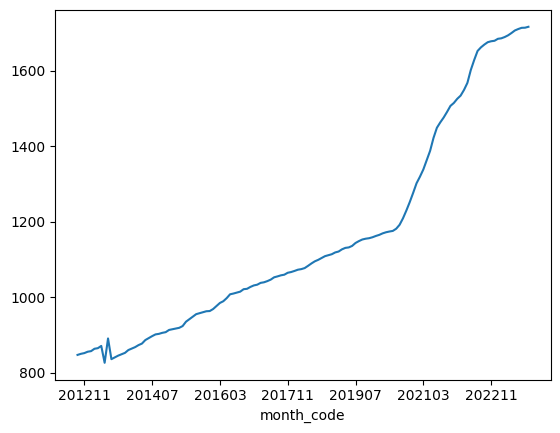

In [52]:
data["cost_m2"].plot()

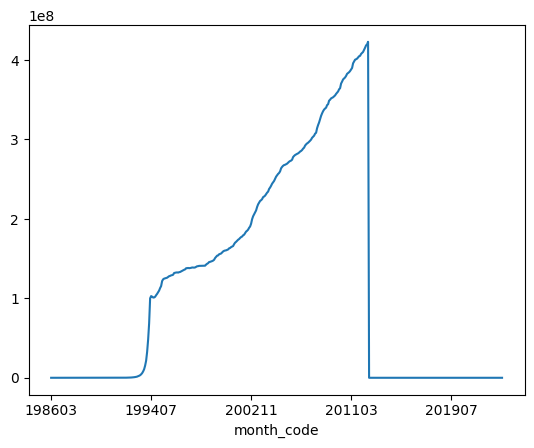

In [57]:
import matplotlib.pyplot as plt
data["cost_m2_index"].plot()

# plt.ylim([0,200])

plt.show()

In [9]:
!pip install sidrapy -q

In [147]:
import sidrapy
import numpy as np


def _to_number(x):
    try:
        return float(x)
    except ValueError:
        return np.nan


In [195]:
%%time

# https://railandeivid.medium.com/usando-a-biblioteca-sidrapy-para-acessar-a-api-sidra-do-ibge-usando-python-1ef81a036f50
# https://apisidra.ibge.gov.br/home

columns = {
    #"Unidade de Medida",
    "Valor": "value",
    "Indústria geral, indústrias extrativas e indústrias de transformação e atividades (CNAE 2.0)": "industry_sector",
    "Mês (Código)": "month_code",
    "Variável": "variable",
}

replaces = {
    "variable": {
        'IPP - Número-índice (dezembro de 2018 = 100)': 'ipp_n_indice',
        'IPP - Variação acumulada no ano (em relação a dezembro do ano anterior)': 'ipp_current_year',
        'IPP - Variação mês/mesmo mês do ano anterior (M/M-12)': 'ipp_last_year',
        'IPP - Variação mês/mês imediatamente anterior (M/M-1)': 'ipp_last_month',
    },

    'industry_sector': {
        'Indústria Geral': 'general',
        'B Indústrias Extrativas': 'extractive',
        'C Indústrias de Transformação': 'transformation',
        '10 FABRICAÇÃO DE PRODUTOS ALIMENTÍCIOS': 'food',
        '11 FABRICAÇÃO DE BEBIDAS': 'drink',
        '12 FABRICAÇÃO DE PRODUTOS DO FUMO': 'smoking',
        '13 FABRICAÇÃO DE PRODUTOS TÊXTEIS': 'textile',
        '14 CONFECÇÃO DE ARTIGOS DO VESTUÁRIO E ACESSÓRIOS': 'clothes',
        '15 PREPARAÇÃO DE COUROS E FABRICAÇÃO DE ARTEFATOS DE COURO, ARTIGOS PARA VIAGEM E CALÇADOS': 'leather_or_shoes',
        '16 FABRICAÇÃO DE PRODUTOS DE MADEIRA': 'wood',
        '17 FABRICAÇÃO DE CELULOSE, PAPEL E PRODUTOS DE PAPEL': 'paper',
        '18 IMPRESSÃO E REPRODUÇÃO DE GRAVAÇÕES': 'printing',
        '19 FABRICAÇÃO DE COQUE, DE PRODUTOS DERIVADOS DO PETRÓLEO E DE BIOCOMBUSTÍVEIS': 'petrochemicals_fuels_biofuels',
        '20B FABRICAÇÃO DE SABÕES, DETERGENTES, PRODUTOS DE LIMPEZA, COSMÉTICOS, PRODUTOS DE PERFUMARIA E DE HIGIENE PESSOAL': 'hygiene_and_cleaning',
        '20C FABRICAÇÃO DE OUTROS PRODUTOS QUÍMICOS': 'chemicals',
        '21 FABRICAÇÃO DE PRODUTOS FARMOQUÍMICOS E FARMACÊUTICOS': 'pharmaceutical',
        '22 FABRICAÇÃO DE PRODUTOS DE BORRACHA E DE MATERIAL PLÁSTICO': 'rubber_and_plastic',
        '23 FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO METÁLICOS': 'non_metallic_minerals',
        '24 METALURGIA': 'metallurgy',
        '25 FABRICAÇÃO DE PRODUTOS DE METAL, EXCETO MÁQUINAS E EQUIPAMENTOS': 'metal_products_except_machines_and_equipment',
        '26 FABRICAÇÃO DE EQUIPAMENTOS DE INFORMÁTICA, PRODUTOS ELETRÔNICOS E ÓPTICOS': 'it_electronics_and_optics',
        '27 FABRICAÇÃO DE MÁQUINAS, APARELHOS E MATERIAIS ELÉTRICOS': 'eletrical_machine_apparatus_and_materials',
        '28 FABRICAÇÃO DE MÁQUINAS E EQUIPAMENTOS': 'machines_and_equipment',
        '29 FABRICAÇÃO DE VEÍCULOS AUTOMOTORES, REBOQUES E CARROCERIAS': 'motor_vehicles',
        '30 FABRICAÇÃO DE OUTROS EQUIPAMENTOS DE TRANSPORTE, EXCETO VEÍCULOS AUTOMOTORES': 'transportation_equipment_except_vehicles',
        '31 FABRICAÇÃO DE MÓVEIS': 'fornitures'
    }
}

data_raw = sidrapy.get_table(
    table_code='6903',
    territorial_level="1",
    ibge_territorial_code="all",
    period="all",
    classifications = {842: "all"}
) 

data = data_raw.iloc[1:]
data.columns = data_raw.iloc[0]

df = data[columns.keys()]

df.columns = columns.values()

for col in replaces:
    df[col] = df[col].replace(replaces[col])


df["value"] = df["value"].apply(lambda x: _to_number(x))

df = df.pivot_table(values="value", index="month_code", columns=['variable', 'industry_sector'])
df.columns = [str(_[0])+"_"+str(_[1]) for i, _ in enumerate(df.columns)]
df = df/100

df = df.reset_index()

df['year'] = df.reset_index()['month_code'].str[:4].astype(int)

df['month'] = df.reset_index()['month_code'].str[4:6].astype(int)

df["date"] = df.apply(
    lambda row: datetime(row["year"], row["month"], 1) + pd.offsets.MonthEnd(0),
    axis=1,
)

df = df.drop(columns = ["year", "month", "month_code"])
df = df[["date"] + [x for x in df.columns if x != "date"]]

CPU times: user 166 ms, sys: 54 ms, total: 220 ms
Wall time: 41.4 s


<timed exec>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [196]:
df

,date,ipp_current_year_chemicals,ipp_current_year_clothes,ipp_current_year_drink,ipp_current_year_eletrical_machine_apparatus_and_materials,ipp_current_year_extractive,ipp_current_year_food,ipp_current_year_fornitures,ipp_current_year_general,ipp_current_year_hygiene_and_cleaning,...,ipp_n_indice_paper,ipp_n_indice_petrochemicals_fuels_biofuels,ipp_n_indice_pharmaceutical,ipp_n_indice_printing,ipp_n_indice_rubber_and_plastic,ipp_n_indice_smoking,ipp_n_indice_textile,ipp_n_indice_transformation,ipp_n_indice_transportation_equipment_except_vehicles,ipp_n_indice_wood
0,2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.505822,0.583051,0.771402,0.810191,0.624138,0.437876,0.564500,0.610191,0.505114,0.588935
1,2010-01-31,0.0540,0.0021,0.0080,0.0074,NaN,0.0195,-0.0035,NaN,0.0071,...,0.529085,0.591545,0.771402,0.804347,0.626714,0.443323,0.571814,0.619328,0.508359,0.611596
2,2010-02-28,0.0876,0.0116,0.0093,0.0319,NaN,0.0405,0.0112,NaN,-0.0041,...,0.542829,0.593355,0.770696,0.806252,0.633155,0.454969,0.580299,0.626934,0.518898,0.622241
3,2010-03-31,0.0904,0.0064,0.0093,0.0458,NaN,0.0352,0.0051,NaN,-0.0163,...,0.545613,0.585890,0.772141,0.815433,0.633188,0.456784,0.585472,0.625923,0.509396,0.640236
4,2010-04-30,0.1134,0.0143,0.0000,0.0514,NaN,0.0224,0.0077,NaN,0.0043,...,0.554011,0.580357,0.769828,0.830395,0.639712,0.455515,0.592385,0.628449,0.506958,0.664617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2023-05-31,-0.1260,0.0617,0.0795,-0.0097,0.0482,-0.0176,0.0246,-0.0384,-0.0020,...,1.376818,1.753769,1.398199,1.534787,1.520805,1.224666,1.625112,1.590559,1.498930,1.596170
162,2023-06-30,-0.1698,0.0599,0.0728,-0.0138,-0.0620,-0.0499,0.0224,-0.0646,0.0056,...,1.319365,1.642002,1.396835,1.544957,1.504415,1.218758,1.606263,1.553443,1.471129,1.572595
163,2023-07-31,-0.1818,0.0905,0.0686,-0.0246,-0.0145,-0.0599,0.0227,-0.0717,0.0047,...,1.330761,1.594080,1.387371,1.543042,1.484584,1.230851,1.586218,1.537445,1.460650,1.558705
164,2023-08-31,-0.1738,0.0795,0.0714,-0.0267,0.0501,-0.0614,0.0200,-0.0647,0.0094,...,1.316263,1.714374,1.371644,1.542706,1.477297,1.238320,1.572441,1.544697,1.487038,1.537018


In [194]:
df

,ipp_current_year_chemicals,ipp_current_year_clothes,ipp_current_year_drink,ipp_current_year_eletrical_machine_apparatus_and_materials,ipp_current_year_extractive,ipp_current_year_food,ipp_current_year_fornitures,ipp_current_year_general,ipp_current_year_hygiene_and_cleaning,ipp_current_year_it_electronics_and_optics,...,ipp_n_indice_petrochemicals_fuels_biofuels,ipp_n_indice_pharmaceutical,ipp_n_indice_printing,ipp_n_indice_rubber_and_plastic,ipp_n_indice_smoking,ipp_n_indice_textile,ipp_n_indice_transformation,ipp_n_indice_transportation_equipment_except_vehicles,ipp_n_indice_wood,date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.583051,0.771402,0.810191,0.624138,0.437876,0.564500,0.610191,0.505114,0.588935,2009-12-31
1,0.0540,0.0021,0.0080,0.0074,NaN,0.0195,-0.0035,NaN,0.0071,0.0018,...,0.591545,0.771402,0.804347,0.626714,0.443323,0.571814,0.619328,0.508359,0.611596,2010-01-31
2,0.0876,0.0116,0.0093,0.0319,NaN,0.0405,0.0112,NaN,-0.0041,0.0038,...,0.593355,0.770696,0.806252,0.633155,0.454969,0.580299,0.626934,0.518898,0.622241,2010-02-28
3,0.0904,0.0064,0.0093,0.0458,NaN,0.0352,0.0051,NaN,-0.0163,0.0010,...,0.585890,0.772141,0.815433,0.633188,0.456784,0.585472,0.625923,0.509396,0.640236,2010-03-31
4,0.1134,0.0143,0.0000,0.0514,NaN,0.0224,0.0077,NaN,0.0043,0.0098,...,0.580357,0.769828,0.830395,0.639712,0.455515,0.592385,0.628449,0.506958,0.664617,2010-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,-0.1260,0.0617,0.0795,-0.0097,0.0482,-0.0176,0.0246,-0.0384,-0.0020,-0.0178,...,1.753769,1.398199,1.534787,1.520805,1.224666,1.625112,1.590559,1.498930,1.596170,2023-05-31
162,-0.1698,0.0599,0.0728,-0.0138,-0.0620,-0.0499,0.0224,-0.0646,0.0056,-0.0159,...,1.642002,1.396835,1.544957,1.504415,1.218758,1.606263,1.553443,1.471129,1.572595,2023-06-30
163,-0.1818,0.0905,0.0686,-0.0246,-0.0145,-0.0599,0.0227,-0.0717,0.0047,-0.0156,...,1.594080,1.387371,1.543042,1.484584,1.230851,1.586218,1.537445,1.460650,1.558705,2023-07-31
164,-0.1738,0.0795,0.0714,-0.0267,0.0501,-0.0614,0.0200,-0.0647,0.0094,-0.0431,...,1.714374,1.371644,1.542706,1.477297,1.238320,1.572441,1.544697,1.487038,1.537018,2023-08-31


In [ ]:
df_raw = pd.DataFrame(json_file[1:])
df_raw.columns = json_file[0].values()

df_raw.head(10)

In [24]:
import requests
import urllib3
import ssl


class HttpClient:
    @staticmethod
    def get_legacy_session():
        ctx = ssl.create_default_context(ssl.Purpose.SERVER_AUTH)
        ctx.options |= 0x4  # OP_LEGACY_SERVER_CONNECT
        session = requests.session()
        session.mount("https://", HttpAdapter(ctx))
        return session


class HttpAdapter(requests.adapters.HTTPAdapter):
    # "Transport adapter" that allows us to use custom ssl_context.

    def __init__(self, ssl_context=None, **kwargs):
        self.ssl_context = ssl_context
        super().__init__(**kwargs)

    def init_poolmanager(self, connections, maxsize, block=False):
        self.poolmanager = urllib3.poolmanager.PoolManager(
            num_pools=connections,
            maxsize=maxsize,
            block=block,
            ssl_context=self.ssl_context,
        )

In [138]:
table_code = '6903'
territorial_level = '1'
ibge_territorial_code = 'all'
period = 'all'
variable = None
kwargs = {"C842"}

query_url = ENDPOINT_BASE + "/values"

query_url += f"/t/{table_code}"
query_url += f"/n{territorial_level}"
query_url += f"/{ibge_territorial_code}"

if period:
    query_url += f"/p/{period}"

if variable:
    query_url += f"/v/{variable}"

query_url

'https://apisidra.ibge.gov.br/values/t/6903/n1/all'

In [139]:
%%time


# https://railandeivid.medium.com/usando-a-biblioteca-sidrapy-para-acessar-a-api-sidra-do-ibge-usando-python-1ef81a036f50
# https://apisidra.ibge.gov.br/home

ENDPOINT_BASE = "https://apisidra.ibge.gov.br"


url = "https://apisidra.ibge.gov.br/values/t/6903/n1/all/c842/all/p/all?formato=json"

with HttpClient.get_legacy_session() as session:
    response = session.get(url)

CPU times: user 99.9 ms, sys: 57.5 ms, total: 157 ms
Wall time: 1min 7s


In [140]:
json_file = response.json()
df_raw = pd.DataFrame(json_file[1:])
df_raw.columns = json_file[0].values()

df_raw.head(10)

,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,"Indústria geral, indústrias extrativas e indústrias de transformação e atividades (CNAE 2.0) (Código)","Indústria geral, indústrias extrativas e indústrias de transformação e atividades (CNAE 2.0)",Mês (Código),Mês,Variável (Código),Variável
0,1,Brasil,,,...,1,Brasil,46608,Indústria Geral,200912,dezembro 2009,1396,IPP - Variação mês/mês imediatamente anterior ...
1,1,Brasil,,,...,1,Brasil,46608,Indústria Geral,200912,dezembro 2009,1395,IPP - Variação acumulada no ano (em relação a ...
2,1,Brasil,,,...,1,Brasil,46608,Indústria Geral,200912,dezembro 2009,1394,IPP - Variação mês/mesmo mês do ano anterior (...
3,1,Brasil,30,Número-índice,-,1,Brasil,46608,Indústria Geral,200912,dezembro 2009,10008,IPP - Número-índice (dezembro de 2018 = 100)
4,1,Brasil,2,%,-,1,Brasil,46608,Indústria Geral,201001,janeiro 2010,1396,IPP - Variação mês/mês imediatamente anterior ...
5,1,Brasil,2,%,-,1,Brasil,46608,Indústria Geral,201001,janeiro 2010,1395,IPP - Variação acumulada no ano (em relação a ...
6,1,Brasil,,,...,1,Brasil,46608,Indústria Geral,201001,janeiro 2010,1394,IPP - Variação mês/mesmo mês do ano anterior (...
7,1,Brasil,30,Número-índice,-,1,Brasil,46608,Indústria Geral,201001,janeiro 2010,10008,IPP - Número-índice (dezembro de 2018 = 100)
8,1,Brasil,2,%,-,1,Brasil,46608,Indústria Geral,201002,fevereiro 2010,1396,IPP - Variação mês/mês imediatamente anterior ...
9,1,Brasil,2,%,-,1,Brasil,46608,Indústria Geral,201002,fevereiro 2010,1395,IPP - Variação acumulada no ano (em relação a ...


In [141]:
columns = {
    #"Unidade de Medida",
    "Valor": "value",
    "Indústria geral, indústrias extrativas e indústrias de transformação e atividades (CNAE 2.0)": "industry_sector",
    "Mês (Código)": "month",
    "Variável": "variable",
}

replaces = {
    "variable": {
        'IPP - Número-índice (dezembro de 2018 = 100)': 'ipp_n_indice',
        'IPP - Variação acumulada no ano (em relação a dezembro do ano anterior)': 'ipp_current_year',
        'IPP - Variação mês/mesmo mês do ano anterior (M/M-12)': 'ipp_last_year',
        'IPP - Variação mês/mês imediatamente anterior (M/M-1)': 'ipp_last_month',
    },

    'industry_sector': {
        'Indústria Geral': 'general',
        'B Indústrias Extrativas': 'extractive',
        'C Indústrias de Transformação': 'transformation',
        '10 FABRICAÇÃO DE PRODUTOS ALIMENTÍCIOS': 'food',
        '11 FABRICAÇÃO DE BEBIDAS': 'drink',
        '12 FABRICAÇÃO DE PRODUTOS DO FUMO': 'smoking',
        '13 FABRICAÇÃO DE PRODUTOS TÊXTEIS': 'textile',
        '14 CONFECÇÃO DE ARTIGOS DO VESTUÁRIO E ACESSÓRIOS': 'clothes',
        '15 PREPARAÇÃO DE COUROS E FABRICAÇÃO DE ARTEFATOS DE COURO, ARTIGOS PARA VIAGEM E CALÇADOS': 'leather_or_shoes',
        '16 FABRICAÇÃO DE PRODUTOS DE MADEIRA': 'wood',
        '17 FABRICAÇÃO DE CELULOSE, PAPEL E PRODUTOS DE PAPEL': 'paper',
        '18 IMPRESSÃO E REPRODUÇÃO DE GRAVAÇÕES': 'printing',
        '19 FABRICAÇÃO DE COQUE, DE PRODUTOS DERIVADOS DO PETRÓLEO E DE BIOCOMBUSTÍVEIS': 'petrochemicals_fuels_biofuels',
        '20B FABRICAÇÃO DE SABÕES, DETERGENTES, PRODUTOS DE LIMPEZA, COSMÉTICOS, PRODUTOS DE PERFUMARIA E DE HIGIENE PESSOAL': 'hygiene_and_cleaning',
        '20C FABRICAÇÃO DE OUTROS PRODUTOS QUÍMICOS': 'chemicals',
        '21 FABRICAÇÃO DE PRODUTOS FARMOQUÍMICOS E FARMACÊUTICOS': 'pharmaceutical',
        '22 FABRICAÇÃO DE PRODUTOS DE BORRACHA E DE MATERIAL PLÁSTICO': 'rubber_and_plastic',
        '23 FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO METÁLICOS': 'non_metallic_minerals',
        '24 METALURGIA': 'metallurgy',
        '25 FABRICAÇÃO DE PRODUTOS DE METAL, EXCETO MÁQUINAS E EQUIPAMENTOS': 'metal_products_except_machines_and_equipment',
        '26 FABRICAÇÃO DE EQUIPAMENTOS DE INFORMÁTICA, PRODUTOS ELETRÔNICOS E ÓPTICOS': 'it_electronics_and_optics',
        '27 FABRICAÇÃO DE MÁQUINAS, APARELHOS E MATERIAIS ELÉTRICOS': 'eletrical_machine_apparatus_and_materials',
        '28 FABRICAÇÃO DE MÁQUINAS E EQUIPAMENTOS': 'machines_and_equipment',
        '29 FABRICAÇÃO DE VEÍCULOS AUTOMOTORES, REBOQUES E CARROCERIAS': 'motor_vehicles',
        '30 FABRICAÇÃO DE OUTROS EQUIPAMENTOS DE TRANSPORTE, EXCETO VEÍCULOS AUTOMOTORES': 'transportation_equipment_except_vehicles',
        '31 FABRICAÇÃO DE MÓVEIS': 'fornitures'
    }
}

temp = df_raw[columns.keys()]

temp.columns = columns.values()

for col in replaces:
    temp[col] = temp[col].replace(replaces[col])


/tmp/ipykernel_3336/3009675358.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[col] = temp[col].replace(replaces[col])


In [142]:
temp

,value,industry_sector,month,variable
0,...,general,200912,ipp_last_month
1,...,general,200912,ipp_current_year
2,...,general,200912,ipp_last_year
3,-,general,200912,ipp_n_indice
4,-,general,201001,ipp_last_month
...,...,...,...,...
17259,151.26962,fornitures,202308,ipp_n_indice
17260,-0.68,fornitures,202309,ipp_last_month
17261,1.31,fornitures,202309,ipp_current_year
17262,0.61,fornitures,202309,ipp_last_year


In [143]:
import numpy as np


def _to_number(x):
    try:
        return float(x)
    except ValueError:
        return np.nan


temp["value"] = temp["value"].apply(lambda x: _to_number(x))

/tmp/ipykernel_3336/3061579777.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["value"] = temp["value"].apply(lambda x: _to_number(x))


In [145]:
test = temp.pivot_table(values="value", index="month", columns=['variable', 'industry_sector'])
test.columns = [str(_[0])+"_"+str(_[1]) for i, _ in enumerate(test.columns)]
test

,ipp_current_year_chemicals,ipp_current_year_clothes,ipp_current_year_drink,ipp_current_year_eletrical_machine_apparatus_and_materials,ipp_current_year_extractive,ipp_current_year_food,ipp_current_year_fornitures,ipp_current_year_general,ipp_current_year_hygiene_and_cleaning,ipp_current_year_it_electronics_and_optics,...,ipp_n_indice_paper,ipp_n_indice_petrochemicals_fuels_biofuels,ipp_n_indice_pharmaceutical,ipp_n_indice_printing,ipp_n_indice_rubber_and_plastic,ipp_n_indice_smoking,ipp_n_indice_textile,ipp_n_indice_transformation,ipp_n_indice_transportation_equipment_except_vehicles,ipp_n_indice_wood
month,,,,,,,,,,,,,,,,,,,,,
200912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.58216,58.30510,77.14025,81.01912,62.41384,43.78764,56.45002,61.01908,50.51136,58.89353
201001,5.40,0.21,0.80,0.74,NaN,1.95,-0.35,NaN,0.71,0.18,...,52.90851,59.15453,77.14025,80.43474,62.67136,44.33225,57.18137,61.93280,50.83587,61.15959
201002,8.76,1.16,0.93,3.19,NaN,4.05,1.12,NaN,-0.41,0.38,...,54.28291,59.33545,77.06963,80.62515,63.31555,45.49692,58.02994,62.69342,51.88977,62.22406
201003,9.04,0.64,0.93,4.58,NaN,3.52,0.51,NaN,-1.63,0.10,...,54.56126,58.58896,77.21413,81.54333,63.31882,45.67835,58.54715,62.59231,50.93955,64.02356
201004,11.34,1.43,0.00,5.14,NaN,2.24,0.77,NaN,0.43,0.98,...,55.40107,58.03574,76.98276,83.03947,63.97118,45.55150,59.23851,62.84490,50.69582,66.46171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202305,-12.60,6.17,7.95,-0.97,4.82,-1.76,2.46,-3.84,-0.20,-1.78,...,137.68177,175.37695,139.81993,153.47870,152.08055,122.46661,162.51123,159.05593,149.89303,159.61696
202306,-16.98,5.99,7.28,-1.38,-6.20,-4.99,2.24,-6.46,0.56,-1.59,...,131.93647,164.20017,139.68348,154.49569,150.44152,121.87584,160.62632,155.34428,147.11288,157.25950
202307,-18.18,9.05,6.86,-2.46,-1.45,-5.99,2.27,-7.17,0.47,-1.56,...,133.07611,159.40797,138.73705,154.30422,148.45844,123.08508,158.62184,153.74451,146.06499,155.87047


In [107]:
test2 = pd.DataFrame([{'variable':x[0], 'setor':x[1]} for x in test.columns])

In [109]:
test2['variable'].unique()

array(['IPP - Número-índice (dezembro de 2018 = 100)',
       'IPP - Variação acumulada no ano (em relação a dezembro do ano anterior)',
       'IPP - Variação mês/mesmo mês do ano anterior (M/M-12)',
       'IPP - Variação mês/mês imediatamente anterior (M/M-1)'],
      dtype=object)

In [ ]:


# # Verifique se a solicitação foi bem-sucedida (código de resposta 200)
# if response.status_code == 200:
#     # Converta os dados de resposta para formato JSON
#     data = response.json()

#     # Examine os dados (este é um exemplo simples, ajuste conforme necessário)
#     for item in data:
#         print(f"{item['D1N']}: {item['V']}")

# else:
#     # Se a solicitação não foi bem-sucedida, imprima o código de resposta
#     print(f"Erro na solicitação. Código de resposta: {response.status_code}")
